### Preliminary

In [66]:
import os
import sys
import numpy as np # type: ignore
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from Technical_Indicators.Mean_Reversion.data_prep import fetch_data
import yfinance # type: ignore
from datetime import datetime, timedelta


### Data Prep

#### Realized Volatility

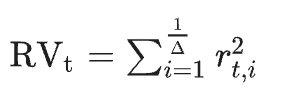

$RV_{t}$ = Daily realized volatility

$t$ = Trading Day

$\frac{1}{\Delta}$ = Trading day split into $\frac{1}{\Delta}$  parts

$r_{t,i}$ = is the $i^{th}$ intraday return at day $t$ = $100(ln(P_{t, i}) - ln(P_{t, i-1}))$

$P_{t, i}$ = is the $i^{th}$ intraday closing price at day $t$


In [46]:
def rv(data):
    """
    data: time-series data of a stock for 1 day
    """
    data.loc[:, 'returns'] = 100 * (np.log(data['Close']) - np.log(data['Close'].shift(1)))    
    data.loc[:, 'returns_squared'] = data['returns'] ** 2
    data = data.dropna()
    rv = data['returns_squared'].sum()
    return rv



The rv of the data is: 1.009


#### Data Gathering

The idea here is to get the RV for each day, and append it to the dataframe for each day

In [63]:
start = '2024-08-22'
end = '2024-09-23'
start= datetime.strptime(start, '%Y-%m-%d')
end = datetime.strptime(end, '%Y-%m-%d')
all_data = []
while start < end:
    next_day = start + timedelta(days=1)
    temp = fetch_data('XOM', start.strftime('%Y-%m-%d'), next_day.strftime('%Y-%m-%d'), interval='1m')
    if not temp.empty:
        all_data.append(temp)
    start = next_day

$XOM: possibly delisted; no price data found  (1m 2024-08-22 -> 2024-08-23) (Yahoo error = "1m data not available for startTime=1724299200 and endTime=1724385600. The requested range must be within the last 30 days.")
$XOM: possibly delisted; no price data found  (1m 2024-08-23 -> 2024-08-24) (Yahoo error = "1m data not available for startTime=1724385600 and endTime=1724472000. The requested range must be within the last 30 days.")
$XOM: possibly delisted; no price data found  (1m 2024-08-24 -> 2024-08-25) (Yahoo error = "1m data not available for startTime=1724472000 and endTime=1724558400. The requested range must be within the last 30 days.")
$XOM: possibly delisted; no price data found  (1m 2024-08-25 -> 2024-08-26)
$XOM: possibly delisted; no price data found  (1m 2024-08-31 -> 2024-09-01)
$XOM: possibly delisted; no price data found  (1m 2024-09-01 -> 2024-09-02)
$XOM: possibly delisted; no price data found  (1m 2024-09-02 -> 2024-09-03)
$XOM: possibly delisted; no price data fou

In [70]:
XOM_history = pd.concat(all_data)